In [40]:
import numpy as np
import sqlite3
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from scipy.stats import binned_statistic

from rubin_scheduler.scheduler.model_observatory import ModelObservatory

from astropy.time import Time


In [2]:
def osf(data):
    result = np.sum(data["visitExposureTime"]) / np.sum(
            data["slewTime"] + data["visitTime"]
        )
    return result

In [13]:
con = sqlite3.connect("baseline_v4.2_1yrs.db")
df = pd.read_sql("select night,slewtime,visitTime,visitExposureTime,scheduler_note,observationStartMJD from observations;", con)
con.close()

In [14]:
df

,night,slewTime,visitTime,visitExposureTime,scheduler_note,observationStartMJD
0,0,102.701384,16.0,15.0,"twilight_near_sun, 0",60980.001582
1,0,4.766004,16.0,15.0,"twilight_near_sun, 0",60980.001822
2,0,4.772121,16.0,15.0,"twilight_near_sun, 0",60980.002063
3,0,4.647978,16.0,15.0,"twilight_near_sun, 0",60980.002302
4,0,4.801038,16.0,15.0,"twilight_near_sun, 0",60980.002542
...,...,...,...,...,...,...
184221,363,5.082469,33.6,29.2,"pair_33, iz, b",61343.272006
184222,363,4.681706,33.6,29.2,"pair_33, iz, b",61343.272449
184223,363,5.094924,33.6,29.2,"pair_33, iz, b",61343.272897
184224,363,4.685788,33.6,29.2,"pair_33, iz, b",61343.273340


In [15]:
bins = np.arange(0,df["night"].max()+2) - 0.5
bs, be, bn = binned_statistic(df["night"], df["slewTime"], statistic=np.sum, bins=bins)

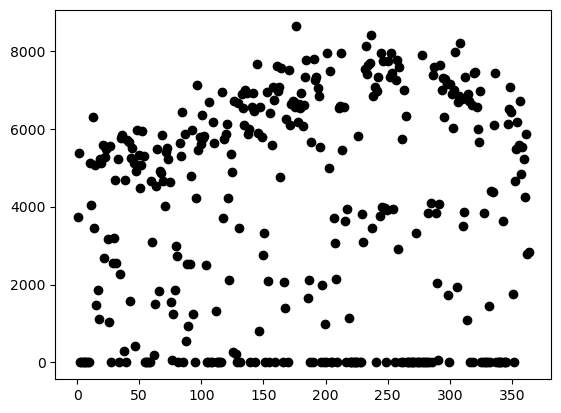

In [16]:
plt.plot(bins[1:], bs, 'ko')

In [17]:
bins = np.arange(0,df["night"].max()+2) - 0.5
u_nights = np.unique(df["night"])
bs = np.empty(u_nights.size)
for i,night in enumerate(u_nights):
    indx = np.where(df["night"] == night)
    bs[i] = osf(df.iloc[indx])

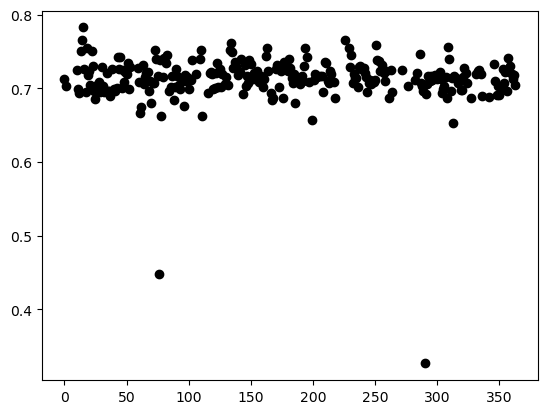

In [18]:
plt.plot(u_nights, bs, 'ko')

In [19]:
u_nights[np.where(bs < 0.6)]

array([ 76, 290])

In [20]:
indx = np.where(df["night"] == 290)
df.iloc[indx]

,night,slewTime,visitTime,visitExposureTime,scheduler_note,observationStartMJD
143062,290,55.887836,33.6,29.2,greedy,61270.430621


In [21]:
# why on earth are there nights with only 1 greedy image?

In [22]:
indx = np.where(df["night"] == 76)
df.iloc[indx]

,night,slewTime,visitTime,visitExposureTime,scheduler_note,observationStartMJD
32198,76,58.235295,33.6,29.2,greedy,61056.372674
32199,76,4.831796,33.6,29.2,greedy,61056.373119


In [24]:
mo = ModelObservatory()

In [25]:
mo.mjd = 61056.37267

In [26]:
mo.downtimes

array([(60704.66      , 60705.66      ), (60709.66      , 60712.66      ),
       (60736.66      , 60743.66      ), (60767.66      , 60768.66      ),
       (60772.66      , 60773.66      ), (60789.66      , 60790.66      ),
       (60830.66      , 60831.66      ), (60833.66      , 60840.66      ),
       (60892.66      , 60893.66      ), (60940.66      , 60947.66      ),
       (60967.66      , 60968.66      ), (60980.17083838, 60980.30763668),
       (60981.09040146, 60981.13206812), (60982.14601586, 60982.18768253),
       (60982.66      , 60989.66      ), (60991.164654  , 60991.27913313),
       (60993.03139083, 60993.16007749), (60995.21626865, 60995.35941755),
       (60996.02204738, 60996.26529684), (60997.04839283, 60997.33790226),
       (60999.15286911, 60999.19453578), (61001.03080398, 61001.22760056),
       (61005.02827391, 61005.31133867), (61007.0188401 , 61007.35730598),
       (61009.14139225, 61009.29487838), (61011.07865327, 61011.12031994),
       (61012.21699077, 6

In [52]:
mo.check_up(mo.mjd-.2)

(False, 61056.37200046531)

In [50]:
mo.check_mjd(mo.mjd-.2)


(False, 61056.37200046531)

In [46]:
mo.cloud_data(Time(mo.mjd-.1, format="mjd"))

0.25

In [45]:
mo.cloud_limit

0.3

In [47]:
cond = mo.return_conditions()

In [49]:
cond.sun_n18_rising

61056.349698679056